In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.isnull().sum().sum()

0

In [7]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

<Figure size 500x500 with 0 Axes>

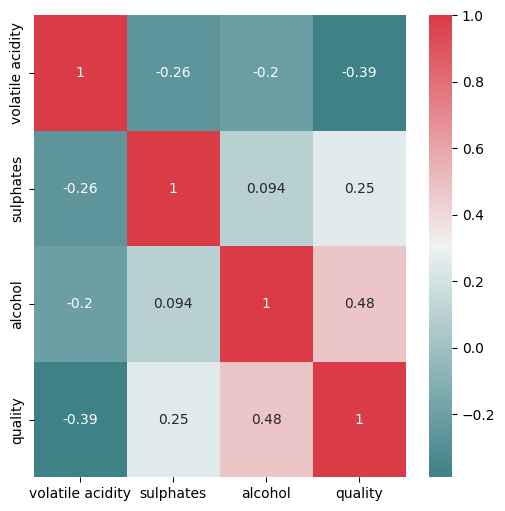

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5), dpi = 100)

# corr = df1.corr()
# sns.heatmap(corr,annot=True, cmap=sns.diverging_palette(200, 10, as_cmap=True))
#plt.show()
# plt.savefig('redwine_corr.png')

# plt.figure(figsize=(14,8), dpi=100)
# plot_tree(dt_clsf, feature_names = featr_list, class_names = cls_list, fontsize=10, filled =True)
# plt.savefig('DecisionTree_Gini_Penguin.svg')

df1 = df.loc[:, ('volatile acidity', 'sulphates', 'alcohol', 'quality')]
# df1
plt.figure(figsize=(6,6))
corr = df1.corr()
sns_plot = sns.heatmap(corr,annot=True, cmap=sns.diverging_palette(200, 10, as_cmap=True))
plt.savefig('output.svg')
plt.show()

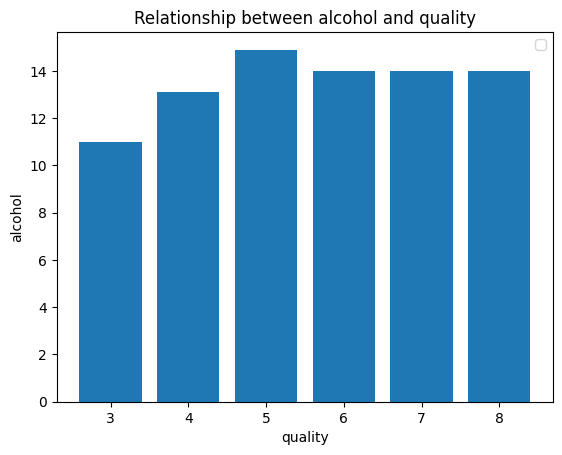

In [9]:
import warnings
warnings.filterwarnings('ignore')

plt.bar(df['quality'], df['alcohol'])
plt.title('Relationship between alcohol and quality')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend("")
plt.savefig('alcohol_quality.svg')
plt.show()

<AxesSubplot:xlabel='quality', ylabel='Count'>

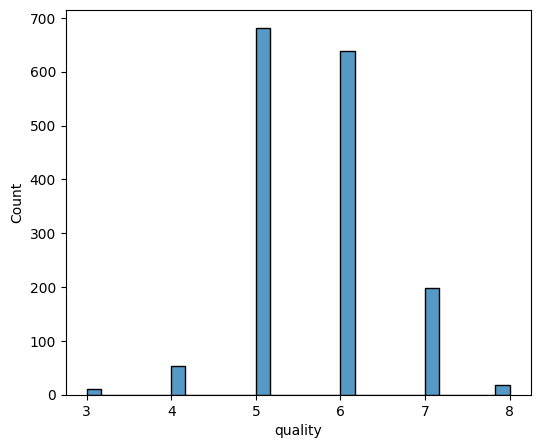

In [10]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
sns.histplot(df['quality'],ax=ax)

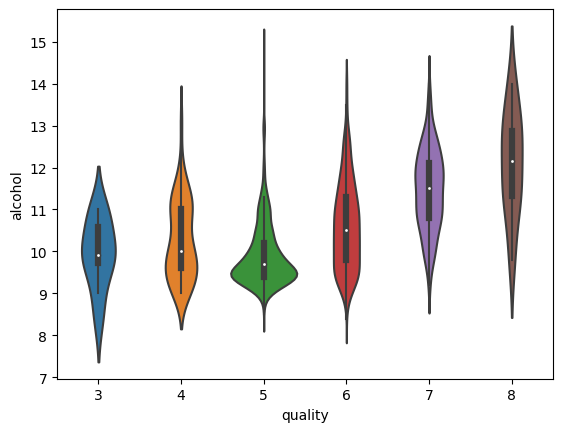

In [11]:
# sns.pairplot(df, hue="quality", height=3, diag_kind="hist")

# g = sns.FacetGrid(df, hue="quality", height = 4) \
#    .map(plt.scatter, "alcohol") \
#    .add_legend()

ax = sns.violinplot(x="quality", y="alcohol", data=df,size=8)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normal_df = scaler.fit_transform(df)
normal_df = pd.DataFrame(normal_df, columns = df.columns)
print(normal_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846      0.4  
1  0.21538

In [13]:
normal_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,0.4
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,0.6
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,0.6
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,0.4


In [14]:
df["good wine"] = ["yes" if i >= 7 else "no" for i in df['quality']]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  good wine             1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [16]:
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good wine
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,no
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,no
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,no
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,no
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,no
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,no
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,no
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,yes
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,yes
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,no


In [17]:
X = normal_df.drop(["quality"], axis = 1)
y = df["good wine"]

In [18]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923


In [19]:
y

0       no
1       no
2       no
3       no
4       no
        ..
1594    no
1595    no
1596    no
1597    no
1598    no
Name: good wine, Length: 1599, dtype: object

In [20]:
y.value_counts()

no     1382
yes     217
Name: good wine, dtype: int64

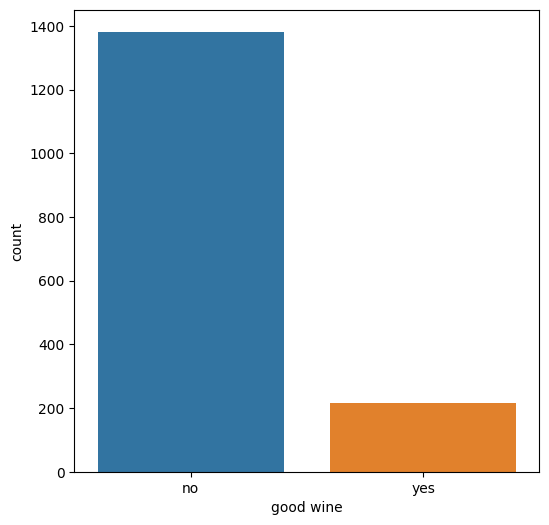

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(x=df["good wine"])
plt.savefig('count_goodwine.svg')
plt.show()

In [22]:
#model the data into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020, stratify=y)

In [23]:
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy='most_frequent',random_state=2020)
dummy_classifier.fit(X_train,y_train)
acc_baseline = dummy_classifier.score(X_test,y_test)
print("Baseline Accuracy = ", acc_baseline)

Baseline Accuracy =  0.8645833333333334


In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=2020)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2020)

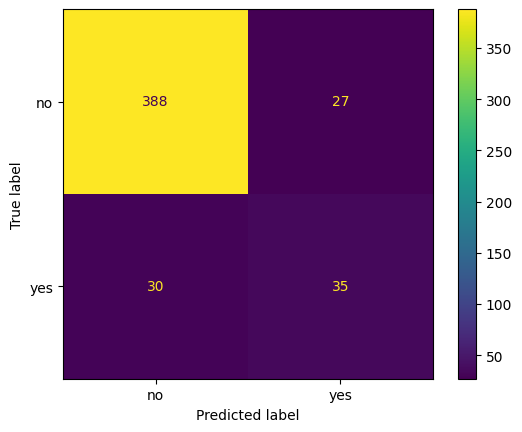

Model Accuracy : 0.88125


In [25]:
# from sklearn.metrics import confusion_matrix
from sklearn import metrics
# from sklearn.metrics import accuracy_score

# cm = confusion_matrix(y_test, y_pred)
# f,ax = plt.subplots(figsize=(4,4))
# sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
# plt.show()
# print(metrics.accuracy_score(y_test, y_pred))


from sklearn.metrics import plot_confusion_matrix
y_pred = dt.predict(X_test)
metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.savefig('cm_before.svg')
plt.show()
print('Model Accuracy :',metrics.accuracy_score(y_test, y_pred))

14
201


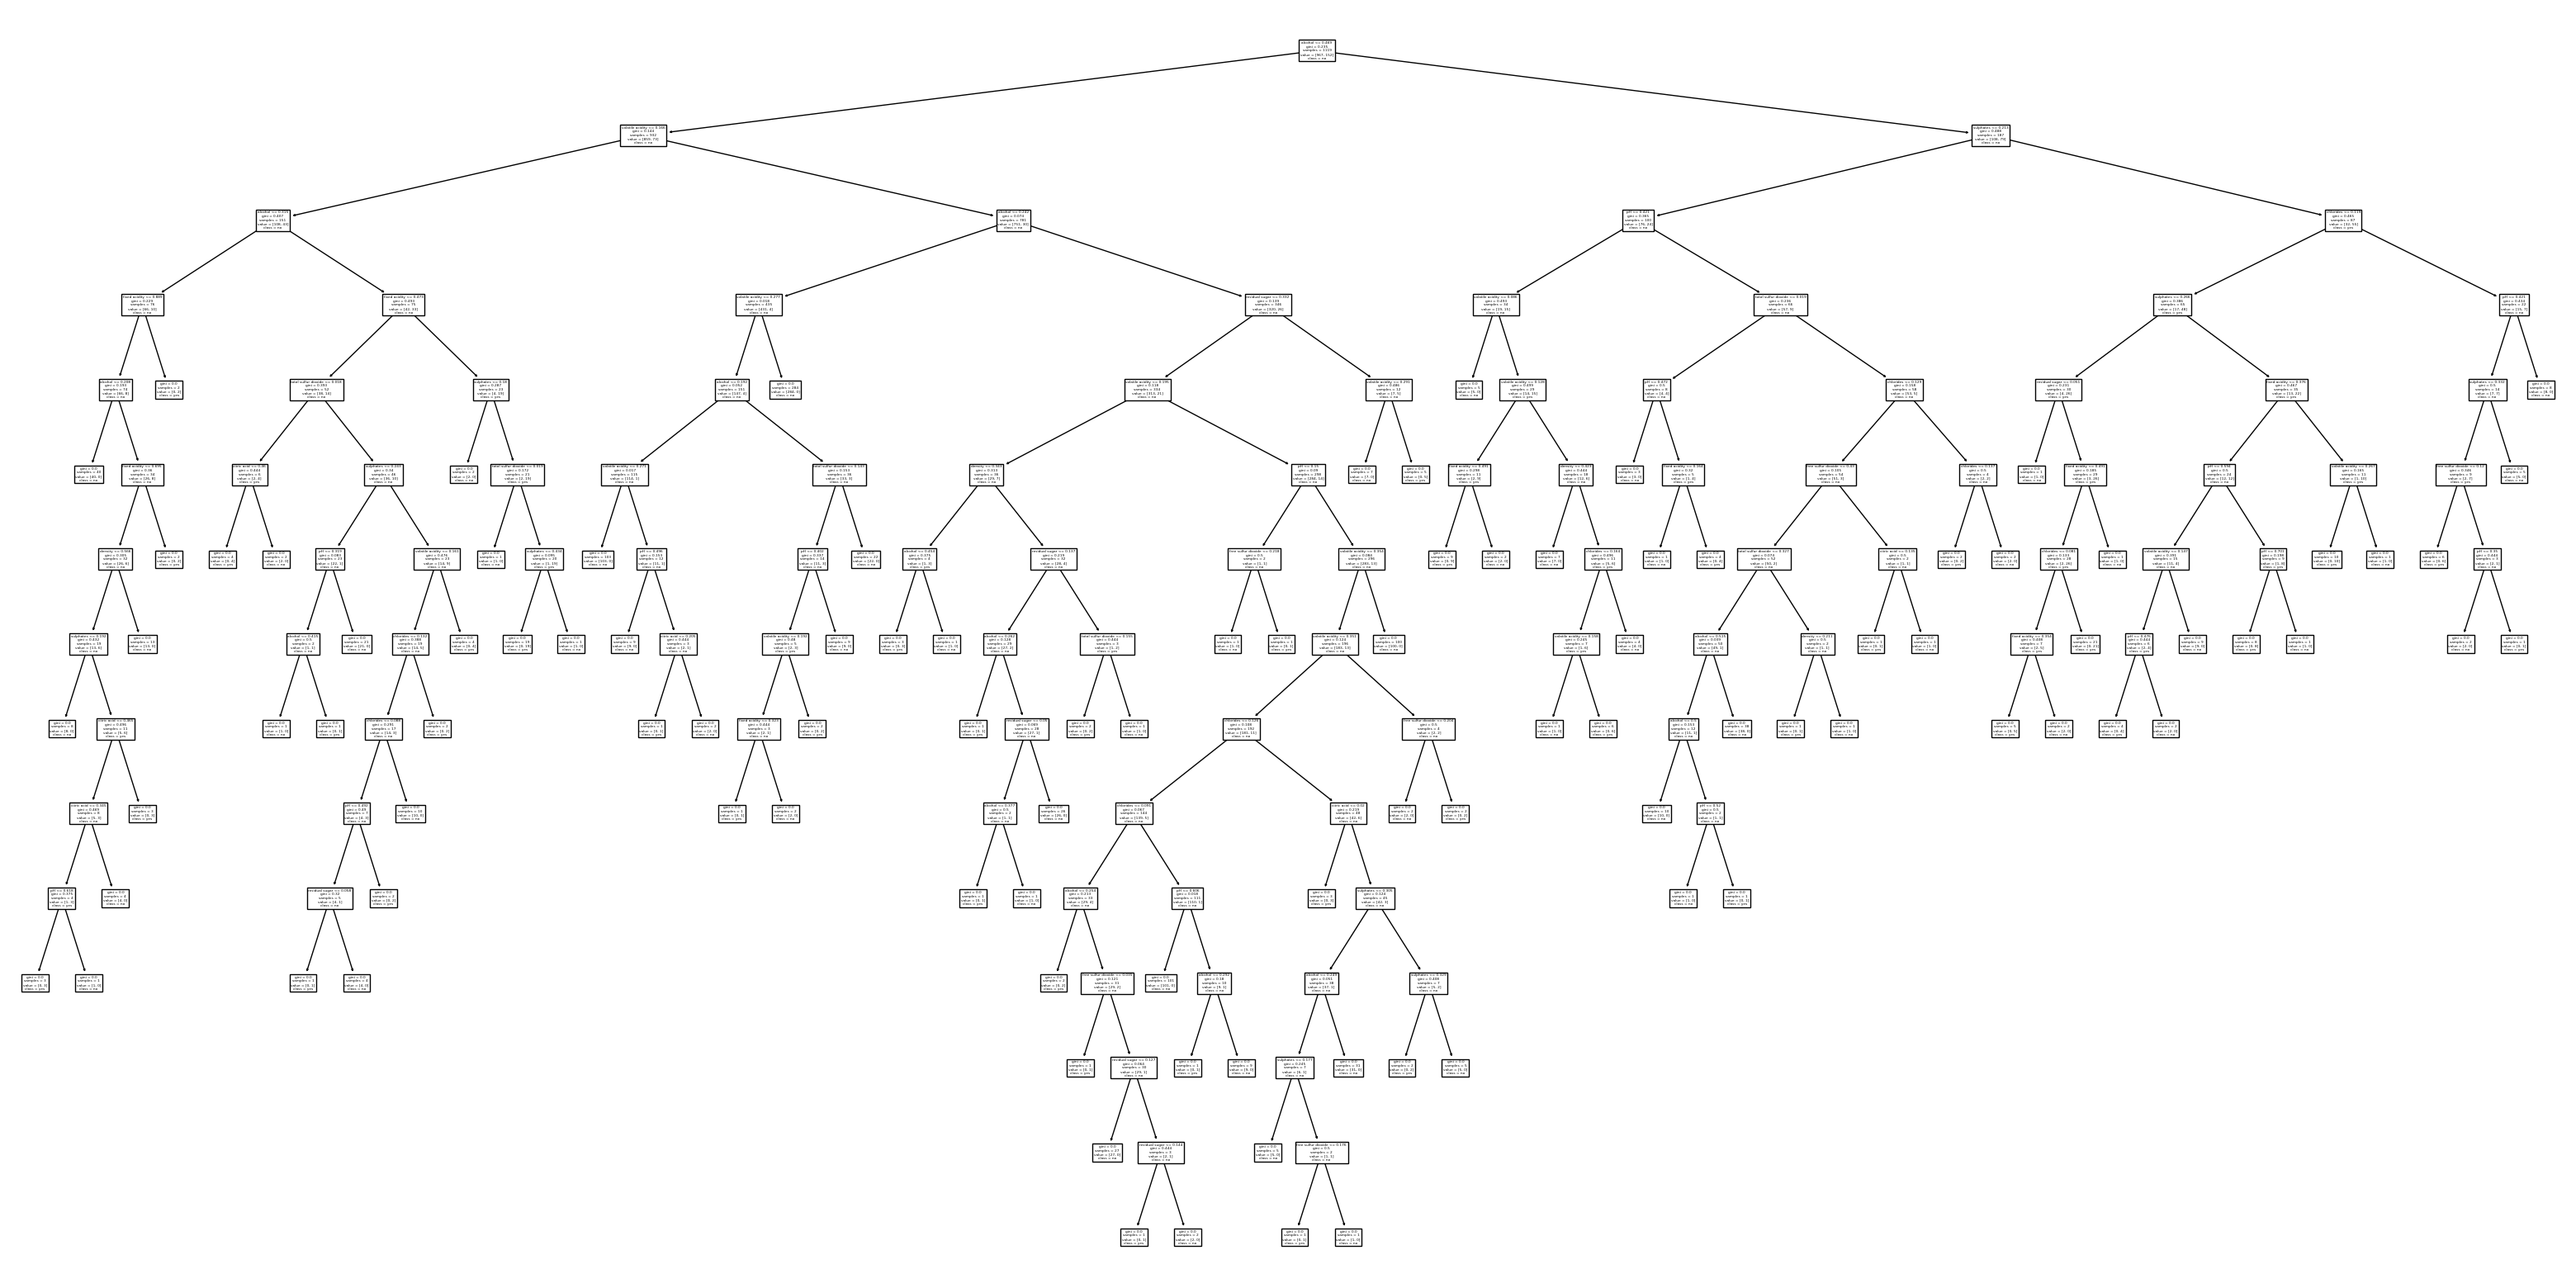

In [26]:
from sklearn import tree
plt.figure(figsize=(40,20))
fn = X.columns
cn = y.unique()
tree.plot_tree(dt, feature_names=fn, class_names=cn, filled=False)
print(dt.tree_.max_depth)
print(dt.tree_.node_count)
plt.show()

In [27]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, X, y, cv=5)
print("Cross Validation Score: ",scores.mean())

Cross Validation Score:  0.8054917711598746


In [28]:
y_pred_train = dt.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

1.0


In [29]:
from sklearn.model_selection import GridSearchCV

param_dist = {"max_depth": range(1,6),
              "max_features": range(1,10),
              "criterion": ["gini", "entropy"]}
dt_cv = GridSearchCV(dt, param_dist, cv=5)
dt_cv.fit(X_train,y_train)
print(dt_cv.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'max_features': 8}


In [30]:
dt_new = DecisionTreeClassifier(criterion = "gini",
                                max_depth = 2,
                                max_features = 8,
                                random_state = 2020)
dt_new.fit(X_train, y_train)
y_pred_new = dt_new.predict(X_test)
print('New Decision Tree Accuracy:',metrics.accuracy_score(y_test, y_pred_new))
scores = cross_val_score(dt_new, X, y, cv=5)
print("New Cross Validation Score: ",scores.mean())

New Decision Tree Accuracy: 0.8854166666666666
New Cross Validation Score:  0.8786794670846394


2
7


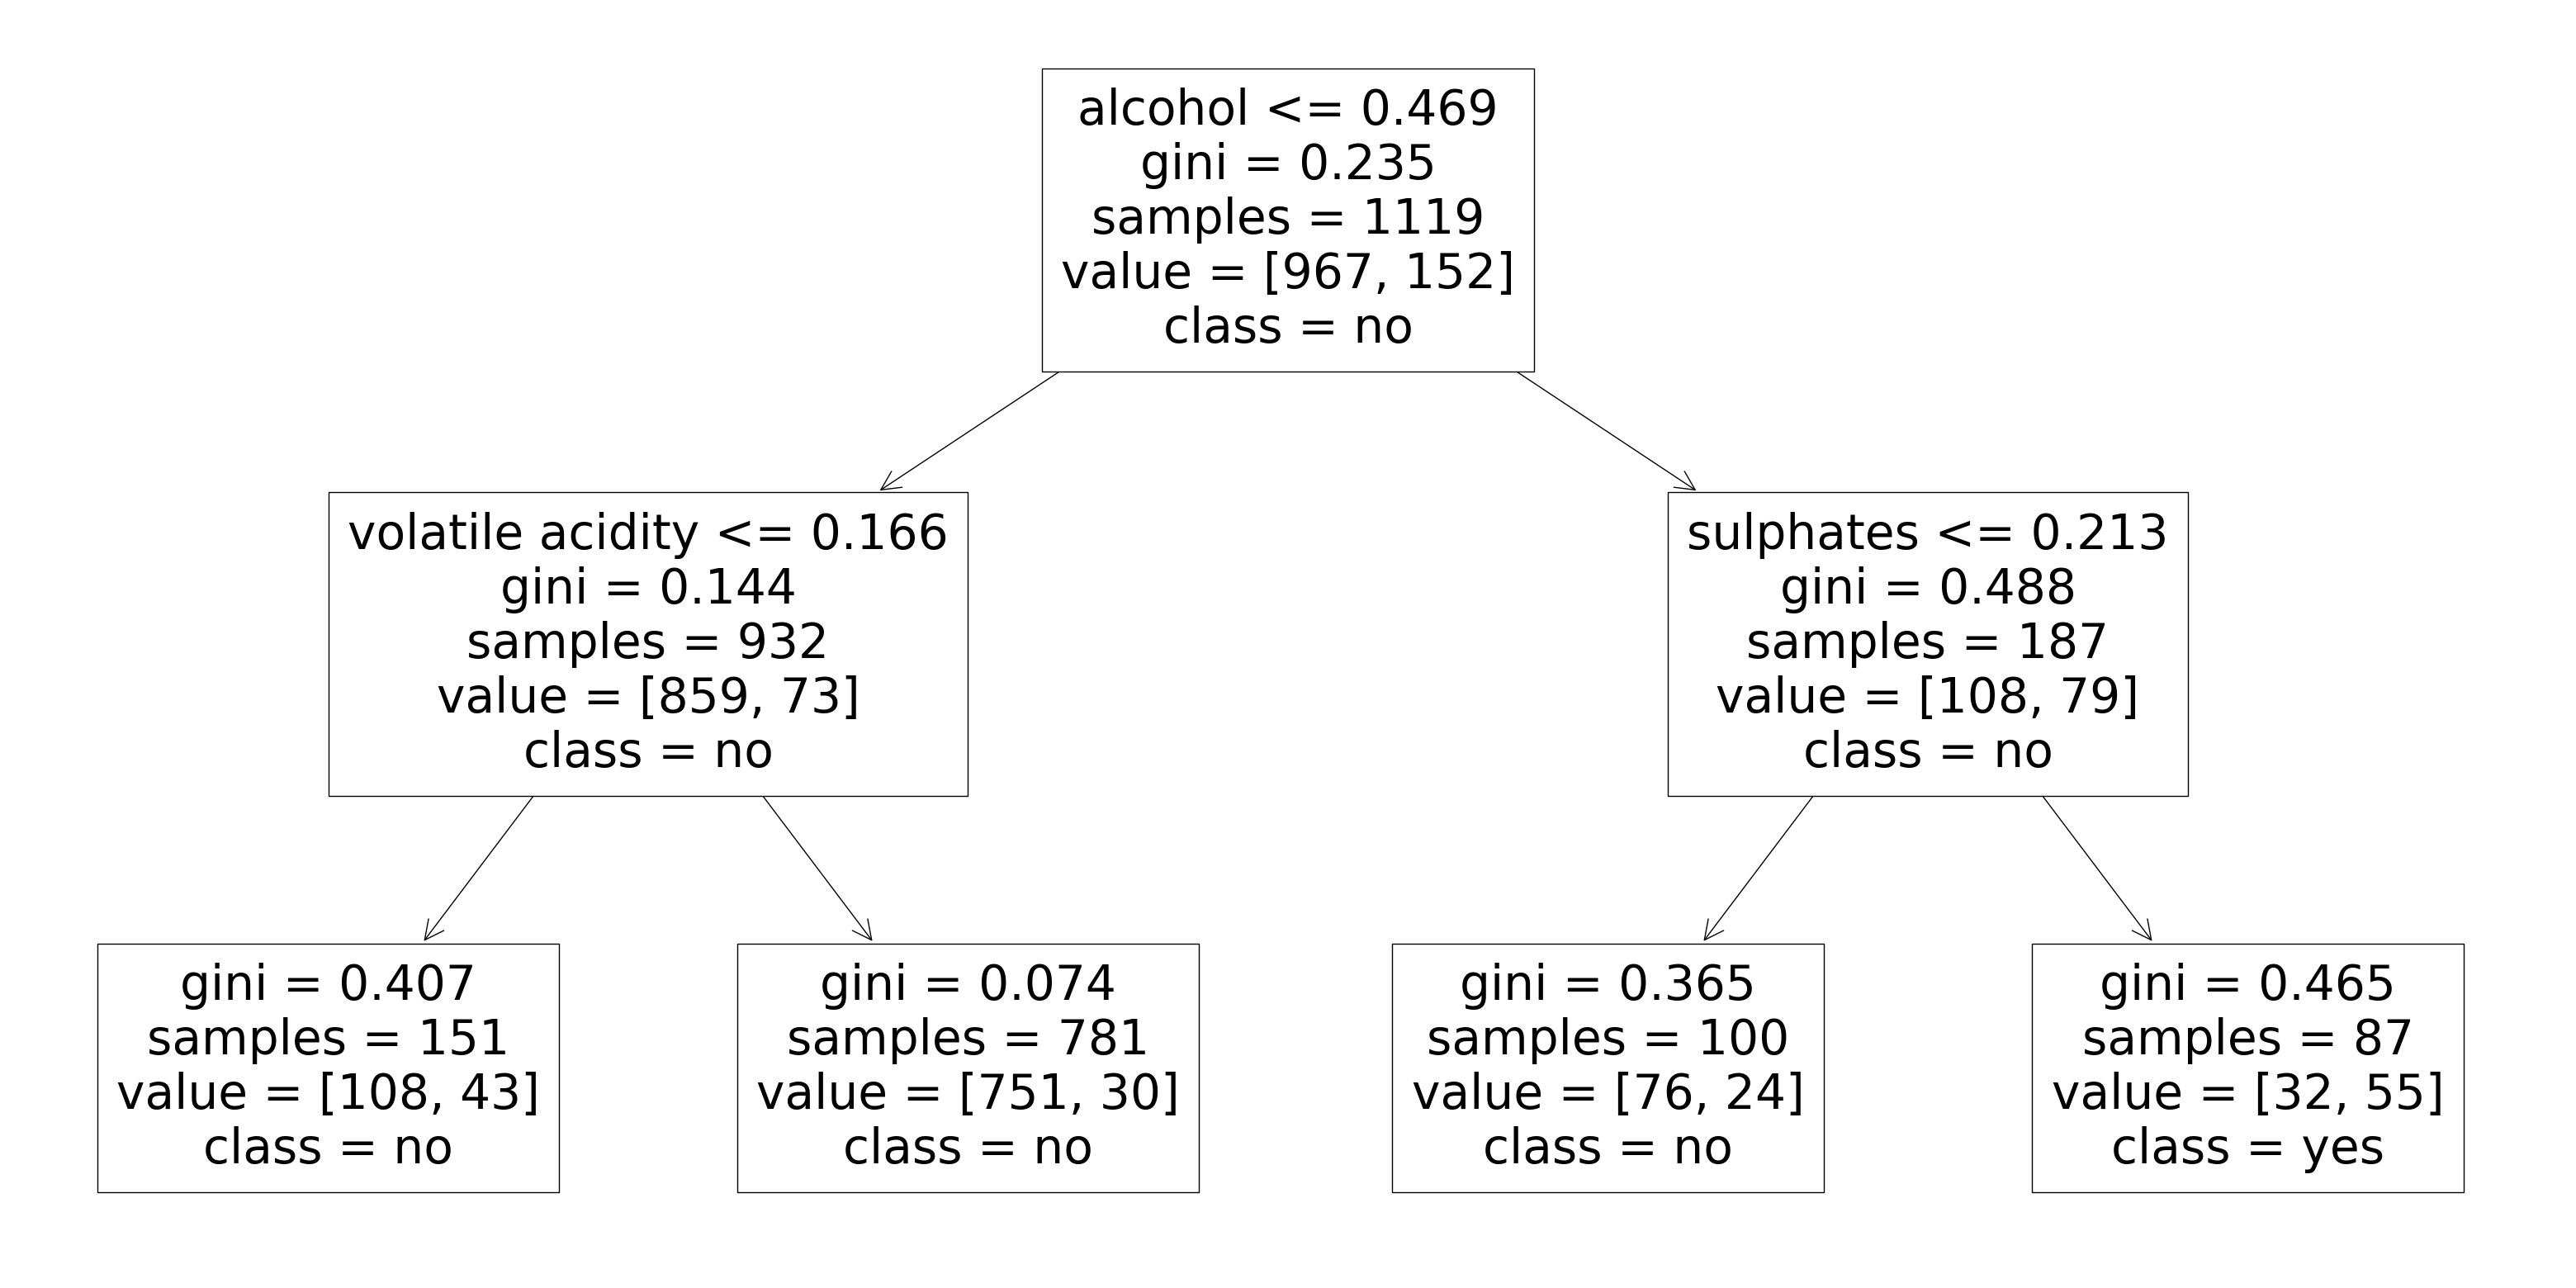

In [31]:
plt.figure(figsize=(40,20))
tree.plot_tree(dt_new, feature_names=fn, class_names=cn, filled=False)
plt.savefig('dt_redwine.svg')
print(dt_new.tree_.max_depth)
print(dt_new.tree_.node_count)
plt.show()
plt.show()

In [32]:
from sklearn.tree import export_text

# export the decision rules
tree_rules = export_text(dt_new,
                        feature_names=list(X.columns))
# print the result
print(tree_rules)

|--- alcohol <= 0.47
|   |--- volatile acidity <= 0.17
|   |   |--- class: no
|   |--- volatile acidity >  0.17
|   |   |--- class: no
|--- alcohol >  0.47
|   |--- sulphates <= 0.21
|   |   |--- class: no
|   |--- sulphates >  0.21
|   |   |--- class: yes



In [33]:
# metrics.plot_confusion_matrix(dt_new, X_test, y_test)
# plt.savefig('cm_after.svg')
# plt.show()
# print(metrics.accuracy_score(y_test, y_pred))

In [34]:
#feature imp
# clf = DecisionTreeClassifier(max_depth = 2, random_state = 2020)
# clf.fit(X_train, y_train)
# score = clf.score(X_test, y_test)
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(dt_new.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances.head()

,feature,importance
10,alcohol,0.554
1,volatile acidity,0.231
9,sulphates,0.215
0,fixed acidity,0.000
2,citric acid,0.000


In [35]:
importances

,feature,importance
10,alcohol,0.554
1,volatile acidity,0.231
9,sulphates,0.215
0,fixed acidity,0.000
2,citric acid,0.000
3,residual sugar,0.000
4,chlorides,0.000
5,free sulfur dioxide,0.000
6,total sulfur dioxide,0.000
7,density,0.000


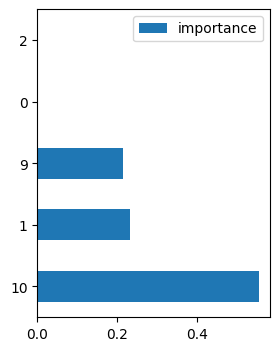

In [41]:
importances.head().plot.barh(figsize=(3,4))
plt.show()

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 2020)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=2020)

In [38]:
y_pred_rf = rf_model.predict(X_test)
acc_rf = metrics.accuracy_score(y_test,y_pred_rf)
print('Accuracy = ', acc_rf)

Accuracy =  0.9166666666666666
